In [3]:
import numpy as np
import pandas as pd
from skimage import data, io
import matplotlib.pyplot as plt
import cv2
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow 
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:


from keras.utils import np_utils
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import Adam
from keras import regularizers
from keras import layers

# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K

In [5]:
# Mount Google drive so dataset can be accessed
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
image = np.load('/content/drive/MyDrive/Colab Notebooks/CNN project1/images.npy')

In [7]:
image.shape

(4750, 128, 128, 3)

In [8]:
label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNN project1/Labels.csv')

In [9]:
label.shape

(4750, 1)

In [10]:
# Normalize the data
X = image.astype('float32') / 255.0

In [11]:
from scipy.signal import convolve2d 

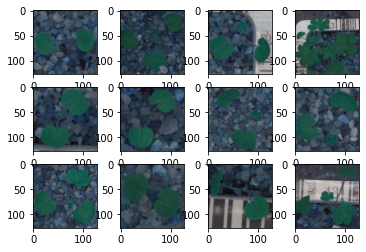

In [12]:
#Visualizing the data
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(image[i])

In [13]:
for img in image:
    # Use gaussian blurring
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)  

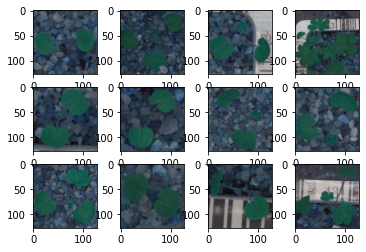

In [14]:
#Visualizing the data after gaussian blur
for i in range(12):
  plt.subplot(3,4, i+1)
  plt.imshow(image[i])

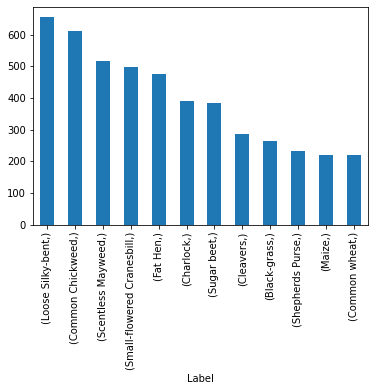

In [15]:
# Plot of label types numbers
label.value_counts().plot(kind='bar')

In [16]:
# Converting labels to one hot vectors
le = preprocessing.LabelEncoder()
le.fit(label)
print("Classes: " + str(le.classes_))
encodelabels = le.transform(label)

# Make labels categorical
catlabel = np_utils.to_categorical(encodelabels)
num_clases = catlabel.shape[1]
print("Number of classes: " + str(num_clases))



Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
Number of classes: 12


In [17]:
#printing the label for Y-train[0]
print ("label[0]", catlabel[0])

label[0] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [18]:
# checking the data type of the encoded labels
X.dtype

dtype('float32')

In [19]:
from sklearn.model_selection import train_test_split
# I used a 70% - 30% test train split, stratified according to training labels.
train_X, test_X, train_Y, test_Y = train_test_split(X, catlabel, 
                                                test_size=0.30, random_state=0, 
                                                stratify = catlabel)

In [20]:
# VALIDATION DATA SPLIT. I used a 50% - 50% test train split, stratified according to training labels.
VALtrain_X, VALtest_X, VALtrain_Y, VALtest_Y = train_test_split(test_X, test_Y, 
                                                test_size=0.50, random_state=0, 
                                                stratify = test_Y)

In [21]:
# checking the shape of the data. DATA is already in compatible shape
print(train_Y.shape)
print(test_Y.shape)

(3325, 12)
(1425, 12)


In [22]:
print(train_X.shape)
print(test_X.shape)
print(VALtrain_X.shape)
print(VALtest_X.shape)

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


In [23]:
#IMAGE PREPROCESSING
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(train_X)

In [24]:
#DEFINING LAYERS
model = Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) # to downsample the feature maps
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_clases, activation='softmax'))


In [25]:
model_A = model

In [26]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [27]:
#Evaluation of the model
history_A = model_A.fit_generator(datagen.flow(train_X, train_Y, batch_size=75), epochs=75, validation_data=(test_X, test_Y), verbose=2)


Epoch 1/75
45/45 - 12s - loss: 2.3776 - accuracy: 0.1672 - val_loss: 2.1261 - val_accuracy: 0.2625
Epoch 2/75
45/45 - 10s - loss: 1.9065 - accuracy: 0.3453 - val_loss: 1.6727 - val_accuracy: 0.4126
Epoch 3/75
45/45 - 10s - loss: 1.7082 - accuracy: 0.3802 - val_loss: 1.6256 - val_accuracy: 0.3923
Epoch 4/75
45/45 - 10s - loss: 1.6187 - accuracy: 0.4147 - val_loss: 1.4756 - val_accuracy: 0.4730
Epoch 5/75
45/45 - 11s - loss: 1.5478 - accuracy: 0.4568 - val_loss: 1.4398 - val_accuracy: 0.4653
Epoch 6/75
45/45 - 11s - loss: 1.4071 - accuracy: 0.5065 - val_loss: 1.2086 - val_accuracy: 0.5516
Epoch 7/75
45/45 - 10s - loss: 1.2629 - accuracy: 0.5573 - val_loss: 1.2089 - val_accuracy: 0.5846
Epoch 8/75
45/45 - 11s - loss: 1.2454 - accuracy: 0.5814 - val_loss: 1.0032 - val_accuracy: 0.6688
Epoch 9/75
45/45 - 10s - loss: 1.1359 - accuracy: 0.6102 - val_loss: 0.9265 - val_accuracy: 0.6898
Epoch 10/75
45/45 - 10s - loss: 1.0491 - accuracy: 0.6466 - val_loss: 0.8800 - val_accuracy: 0.7151
Epoch 11/

In [28]:
model_A = model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 32)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 64)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 128)   0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   1

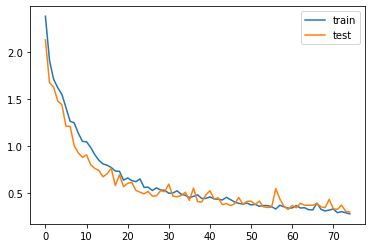

In [29]:
# plot training history
plt.plot(history_A.history['loss'], label='train')
plt.plot(history_A.history['val_loss'], label='test')
plt.legend()
plt.show()

In [30]:
# Final evaluation of the model
scores = model_A.evaluate(test_X, test_Y, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 10.39%


In [31]:
print(model_A.evaluate(train_X, train_Y))  # Evaluate on train set

104/104 [==============================] - 1s 8ms/step - loss: 0.2200 - accuracy: 0.9203
[0.21999014914035797, 0.9203007221221924]


In [32]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.2989388406276703
Test accuracy: 0.8961403369903564


In [33]:
y_pred = model_A.predict_classes(test_X,batch_size = 100,verbose=0)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

In [35]:
test_Y1=np.argmax(test_Y, axis=1)
test_Y1[1]

11

In [36]:
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(test_X,test_Y)[1]))
print('Recall_score: ' + str(recall_score(test_Y1,y_pred,average='weighted')))
print('Precision_score: ' + str(precision_score(test_Y1, y_pred,average='weighted')))
print('F-score: ' + str(f1_score(test_Y1,y_pred,average='weighted')))
confusion_matrix(test_Y1,y_pred)

45/45 [==============================] - 0s 8ms/step - loss: 0.2989 - accuracy: 0.8961
Accuracy Model1 (Dropout): 0.8961403369903564
Recall_score: 0.896140350877193
Precision_score: 0.8945316927209948
F-score: 0.894579724201243


array([[ 40,   0,   0,   0,   8,   2,  28,   0,   1,   0,   0,   0],
       [  0, 113,   1,   0,   0,   0,   0,   1,   0,   1,   1,   0],
       [  0,   4,  81,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   1, 166,   0,   1,   0,   0,   6,   5,   2,   2],
       [  0,   0,   0,   0,  62,   0,   1,   0,   1,   0,   1,   1],
       [  0,   0,   2,   1,   1, 135,   1,   0,   1,   0,   1,   1],
       [ 25,   0,   0,   0,   2,   3, 163,   0,   0,   0,   0,   3],
       [  0,   0,   1,   0,   0,   0,   0,  61,   1,   0,   0,   3],
       [  1,   2,   2,   2,   1,   0,   0,   0, 143,   4,   0,   0],
       [  0,   1,   0,   0,   0,   2,   0,   0,   5,  59,   0,   2],
       [  0,   3,   1,   0,   0,   1,   0,   0,   1,   1, 142,   0],
       [  0,   0,   0,   0,   0,   1,   0,   3,   0,   0,   0, 112]])

Text(0.5, 145.31999999999996, 'Predicted')

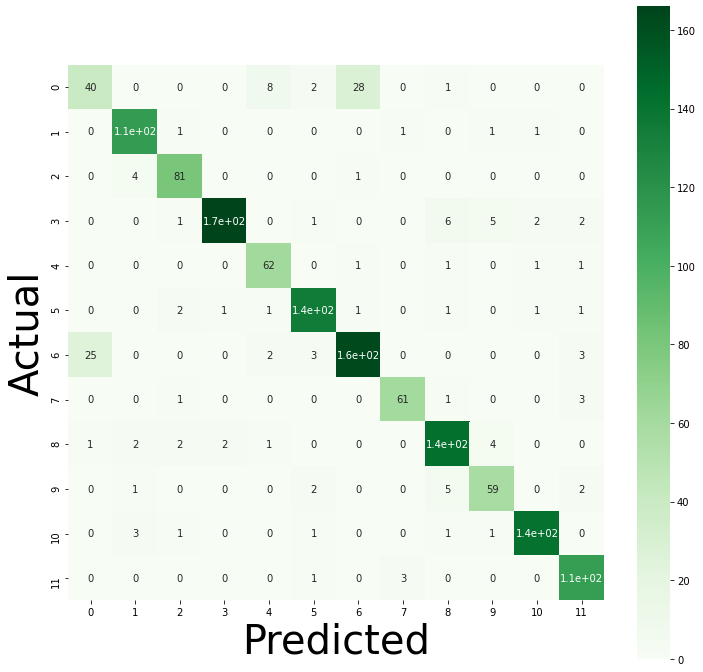

In [37]:
# Plotting the Confusion matrix with seaborn
import seaborn as sns
cm=confusion_matrix(test_Y1,y_pred)
plt.figure(figsize=(12, 12))
CM1 = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True)
CM1.set_ylabel('Actual', fontsize=40)
CM1.set_xlabel('Predicted', fontsize=40)

In [38]:
#PREDICTING AND VISUALIZING values of the test data

In [39]:
# Predict the probability from test image to get predictions
testimage = test_X[2]
testimage.shape


(128, 128, 3)

In [40]:
print("predictions for test_X[2]", y_pred[2])

predictions for test_X[2] 3


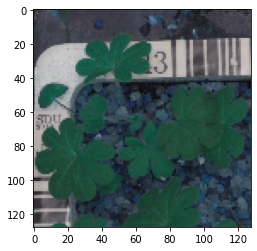

In [41]:
image = np.load('/content/drive/MyDrive/Colab Notebooks/CNN project1/images.npy')
i = y_pred[2]
img1 = image[i]
plt.imshow(img1)

In [42]:
print("predictions for test_X[3]", y_pred[3])

predictions for test_X[3] 3


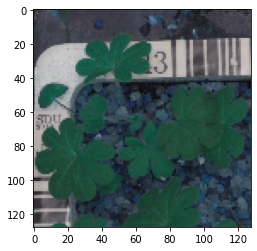

In [43]:
i = y_pred[3]
img1 = image[i]
plt.imshow(img1)

In [44]:
print("predictions for test_X[33]", y_pred[33])

predictions for test_X[33] 7


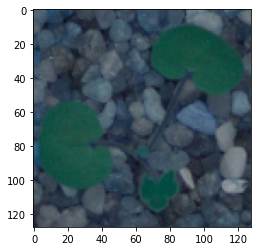

In [45]:
i = y_pred[33]
img1 = image[i]
plt.imshow(img1)

In [46]:
print("predictions for test_X[36]", y_pred[36])

predictions for test_X[36] 5


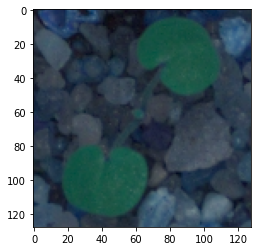

In [47]:
i = y_pred[36]
img1 = image[i]
plt.imshow(img1)

In [48]:
print("predictions for test_X[59]", y_pred[59])

predictions for test_X[59] 5


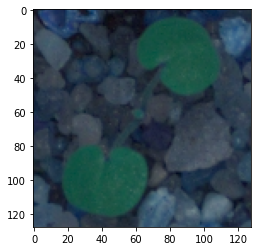

In [49]:
i = y_pred[59]
img1 = image[i]
plt.imshow(img1)